In [76]:
# Import Librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Read dataset file
uber = pd.read_csv('UberDataset.csv')
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [78]:
uber.shape

(1156, 7)

In [79]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Preprocessing

In [80]:
# Missing Value Arrangement
uber['PURPOSE'].fillna('Not',inplace=True)

C:\Users\RAMAN\AppData\Local\Temp\ipykernel_12780\2372942843.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uber['PURPOSE'].fillna('Not',inplace=True)


In [81]:
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Not
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [82]:
# Change Dtype object to datetime
uber['START_DATE'] = pd.to_datetime(uber['START_DATE'], errors = 'coerce')

uber['END_DATE'] = pd.to_datetime(uber['END_DATE'], errors = 'coerce')

In [83]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [84]:
# Add new Column
from datetime import datetime

uber['Date'] = pd.DatetimeIndex(uber['START_DATE']).date

uber['Time'] = pd.DatetimeIndex(uber['START_DATE']).hour

In [85]:
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [86]:
# Add new column and Labels
uber['Day-night'] = pd.cut(x=uber['Time'],bins = [0,11,15,19,24],labels = ['Morning','Afternoon','Evening','Night'])

In [87]:
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [88]:
# All missing values remove
uber.dropna(inplace = True)

In [89]:
uber.shape

(413, 10)

# Data Visualization

<Axes: xlabel='count', ylabel='CATEGORY'>

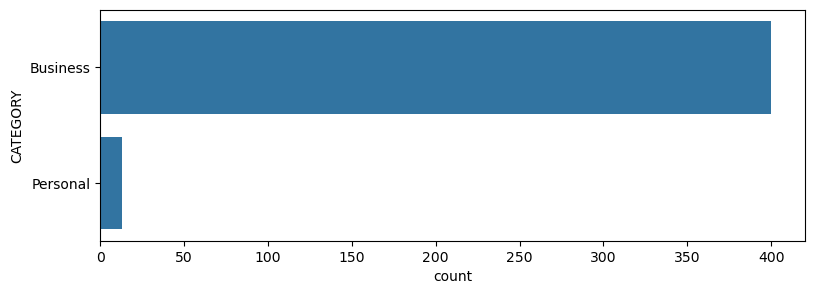

In [90]:
# In Which cetegory do people book the most Uber rides?
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)

sns.countplot(uber['CATEGORY'])


<Axes: xlabel='count', ylabel='PURPOSE'>

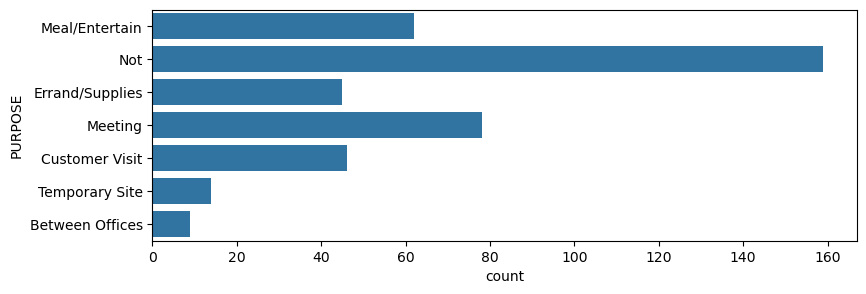

In [94]:
# For which purpose do people book Uber rides the most?
plt.figure(figsize=(20,3))

plt.subplot(1,2,2)

sns.countplot(uber['PURPOSE'])

<Axes: xlabel='count', ylabel='Day-night'>

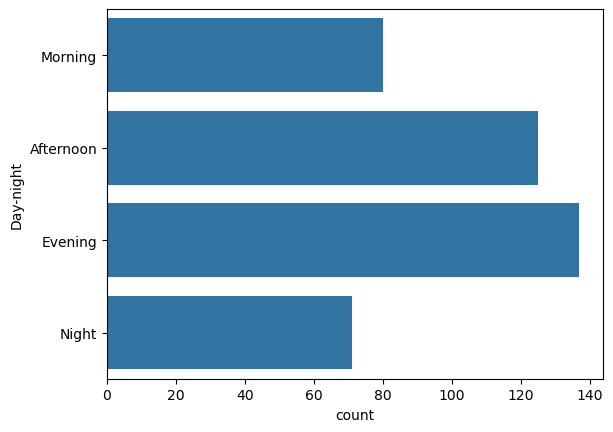

In [92]:
# At what time do people book cabs the most from from Uber?
sns.countplot(uber['Day-night'])

In [95]:
# Add Month column
uber['Month'] = pd.DatetimeIndex(uber['START_DATE']).month # From START_DATE to Extract Month

month_label = {1.0 :'Jan',2.0 :'Feb',3.0 :'Mar',4.0 :'April',
               5.0 :'May',6.0 :'June',7.0 :'July',8.0 :'Aug',
               9.0 :'Sep',10.0 :'Oct',11.0 :'Nov',12.0 :'Dec'} 

uber['Month'] = uber.Month.map(month_label)

mon = uber.Month.value_counts(sort=False)

In [96]:
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day-night,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon,Jan


[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Value Count')]

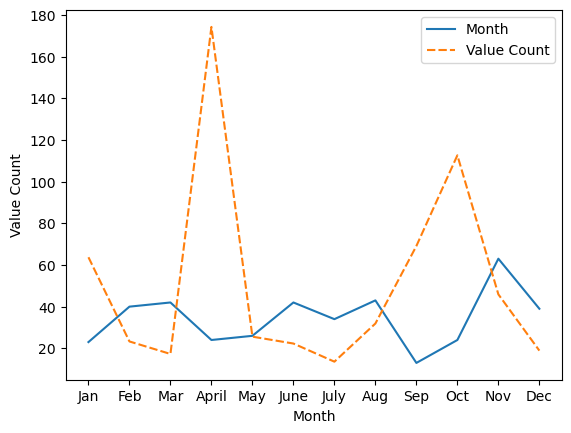

In [101]:
# In Which months do people book Uber rides less frequently?
df = pd.DataFrame({
    "Month": mon.values,
    "Value Count": uber.groupby('Month',sort = False)['MILES'].max()
})

p = sns.lineplot(data=df)
p.set(xlabel="Month",ylabel="Value Count")

In [102]:
# Add week column
uber['Day'] = uber.START_DATE.dt.weekday

day_label = {
    0:'Mon',1:'Tues',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

uber['Day'] = uber['Day'].map (day_label)

In [103]:
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day-night,Month,Day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening,Jan,Tues
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon,Jan,Wed


Text(0, 0.5, 'COUNT')

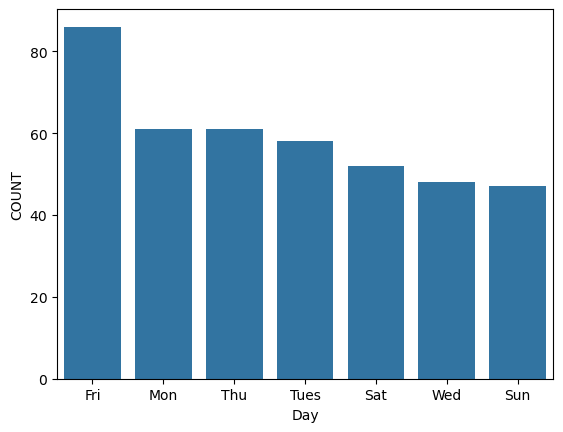

In [107]:
# On which days of the week do people book Uber rides most?
day_label = uber.Day.value_counts()

sns.barplot(x=day_label.index, y=day_label)
plt.xlabel('Day')
plt.ylabel('COUNT')

<Axes: ylabel='MILES'>

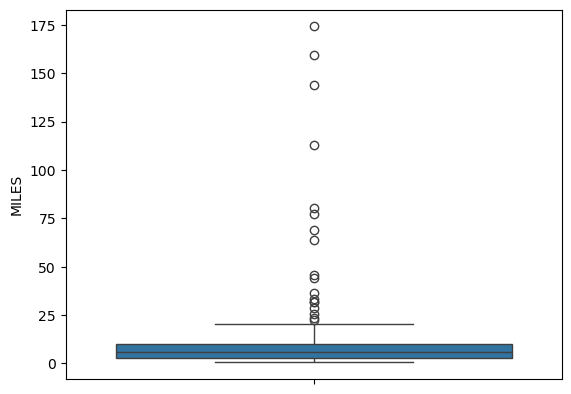

In [116]:
# How many miles do people usually book a cab for through Uber?
sns.boxplot(uber['MILES'])

C:\Users\RAMAN\AppData\Local\Temp\ipykernel_12780\418488408.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uber[uber['MILES']<100]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

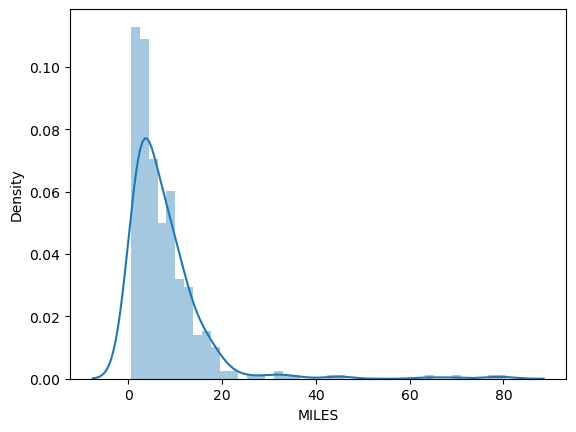

In [121]:
sns.distplot(uber[uber['MILES']<100]['MILES'])

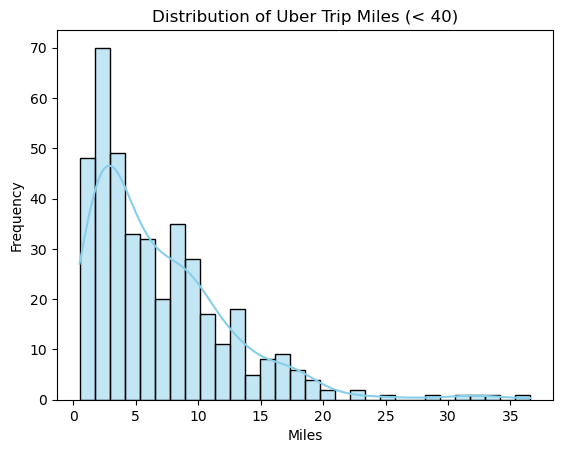

In [117]:
sns.histplot(uber[uber['MILES'] < 40]['MILES'], kde=True, bins=30, color='skyblue')# if you want 
plt.title('Distribution of Uber Trip Miles (< 40)')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()